# Visualización usando graficas de curvas de nivel


## Función Gamma

Usamos las funciones de la librería mpmath que trae implementaciones numéricas eficientes de funciones especiales.

https://mpmath.org/doc/current/search.html?q=gamma

In [1]:
import mpmath
import numpy
import colorsys
import matplotlib.pyplot as plt

In [11]:
# Se genera una malla en el plano del tamaño que queremos:
reales = 200
imaginarios = 200
malla = numpy.zeros((reales, imaginarios), dtype='complex')

# cuadro de visualización en el plano complejo
realmin = -5
realmax = 5
imgmin = -3
imgmax = 3

In [3]:
malla

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [4]:
# calculamos los valores de la función compleja que queremos:

#Ejemplo para la función gamma
for pr in range(reales):
    for pi in range(imaginarios):
        try: 
            parte_real = realmin + ((realmax - realmin) * pr/reales)
            parte_imag = imgmin + ((imgmax - imgmin) * pi/imaginarios)
            #z = mpmath.gamma(complex(parte_real,parte_imag))
            malla[pi,pr] = mpmath.gamma(complex(parte_real,parte_imag))
        except ValueError: # la región donde estamos calculando los valores de la función puede contener polos
            pass
        pass
    pass

malla = numpy.abs(malla)
malla = numpy.log(malla, dtype='float64')

/Users/anieto/miniconda3/envs/tic/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


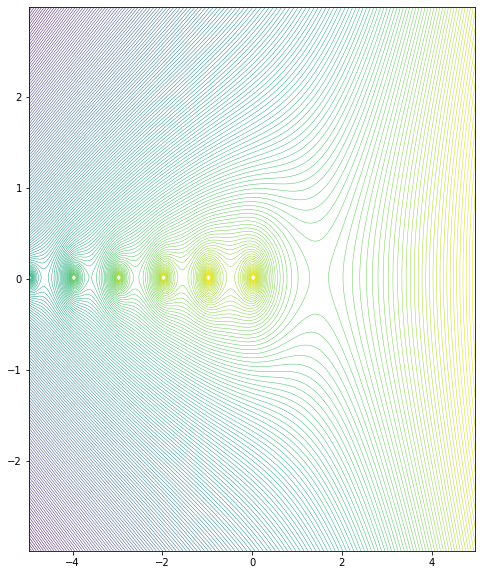

In [9]:
# plot usando matplotlib
plt.figure(figsize = (8,10))
plt.contour(malla, 160, linewidths=0.5, origin='lower', extent=[realmin, realmax, imgmin, imgmax])

## Ejercicio

Usar una función diferente en la forma f(z) = r(x,y) + i y(x,y) para poder graficar las curvas de nivel del módulo

# Función Zeta de Riemann

In [24]:
# Se genera una malla en el plano del tamaño que queremos:
reales = 700
imaginarios = 700
malla = numpy.zeros((reales, imaginarios), dtype='complex')

# cuadro de visualización en el plano complejo
realmin = -3.5
realmax = 2
imgmin = -20
imgmax = 20

In [25]:
#Ejemplo para la función zeta (toma algunos minutos)
for pr in range(reales):
    for pi in range(imaginarios):
        try: 
            parte_real = realmin + ((realmax - realmin) * pr/reales)
            parte_imag = imgmin + ((imgmax - imgmin) * pi/imaginarios)
            #z = mpmath.gamma(complex(parte_real,parte_imag))
            malla[pi,pr] = mpmath.zeta(complex(parte_real,parte_imag))
        except ValueError: # la región donde estamos calculando los valores de la función puede contener polos
            pass
        pass
    pass

malla = numpy.abs(malla) #pasamos al modulo de la función
malla = numpy.log(malla, dtype='float64') # para que no haya demasiada dispersión de valores del módulo, pero puede no usarse

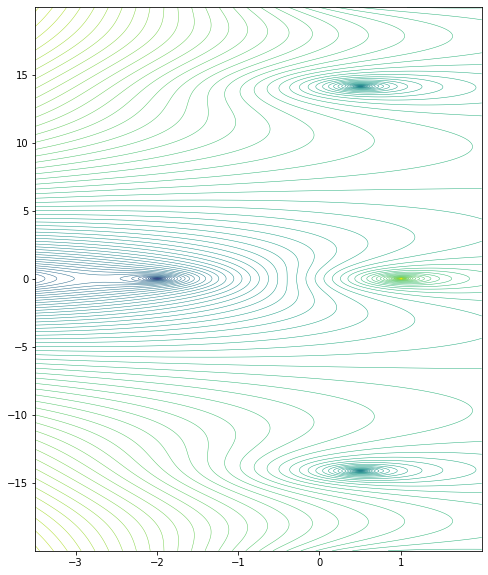

In [31]:
plt.figure(figsize = (8,10))
plt.contour(malla, 100, linewidths=0.5, origin='lower', extent=[realmin, realmax, imgmin, imgmax])

### Podemos mapear los valores de la función Zeta a valores en una escala de colores!

In [27]:
import colorsys

In [35]:
# Se genera una malla en el plano del tamaño que queremos:
reales = 300
imaginarios = 300
malla = numpy.zeros((reales, imaginarios,3), dtype='float64') #notar el tamaño de la malla, es una por cada canal de color

# cuadro de visualización en el plano complejo
realmin = -3
realmax = 1.5
imgmin = -20
imgmax = 20

In [36]:
for pr in range(reales):
    for pi in range(imaginarios):
        try: 
            parte_real = realmin + ((realmax - realmin) * pr/reales)
            parte_imag = imgmin + ((imgmax - imgmin) * pi/imaginarios)
            #malla[pi,pr] = mpmath.zeta(complex(parte_real,parte_imag))
            z = mpmath.zeta(complex(parte_real,parte_imag))
            z2 = numpy.abs(z)
            rgb = colorsys.hsv_to_rgb(z2, 0.8, 0.8)
            malla[pi,pr][0:3] = rgb
        except ValueError: # la región donde estamos calculando los valores de la función puede contener polos
            pass
        pass
    pass

In [37]:
# necesitaremos normalizar al intervalo [0..1] para evitar salirnos de la escala de color
malla += - malla.min()
malla /= malla.max()
print(malla.min(), malla.max())

0.0 1.0


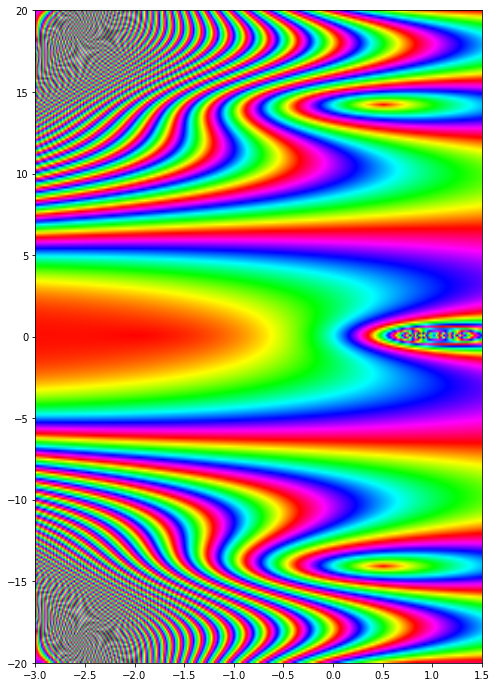

In [39]:
plt.figure(figsize = (8,12))
plt.imshow(malla, aspect='auto', interpolation='bilinear', origin='lower', extent=[realmin, realmax, imgmin, imgmax])